In [43]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import time
from solvers import RK4
from math import sqrt
from math import exp
import numpy as np
import itertools
%matplotlib inline

def ssa(input_values, params, rate_list, change_list):
    values = input_values
    ##The rate at which any event occurs is
    rate_list_vals =  [rli(input_values, params) for i,rli in enumerate(rate_list)]
    ratesum = sum(rate_list_vals)
    ## The time until the next event is
    delta_t = -np.log(np.random.uniform())/ratesum
    ##Generate a new random number and set
    P = np.random.uniform() * ratesum
    sumpl = 0
    sumpr = 0
    for i, ri in enumerate(rate_list_vals):
        sumpr += rate_list_vals[i]
        if sumpl < P < sumpr:
            values = input_values + change_list[i,:]
        sumpl += ri
    return values, delta_t

def siteration(initial_values, params, rate_list, change_list, maxtime):
    values = initial_values
    values_list = []
    for iv in initial_values:
        values_list.append([iv])
    time = 0
    time_list = [time]
    while time < maxtime:
        values, delta_t = ssa(values, params, rate_list, change_list)
        for i, v in enumerate(values):
            values_list[i].append(v)
        time += delta_t
        time_list.append(time)
    return [time_list, values_list]

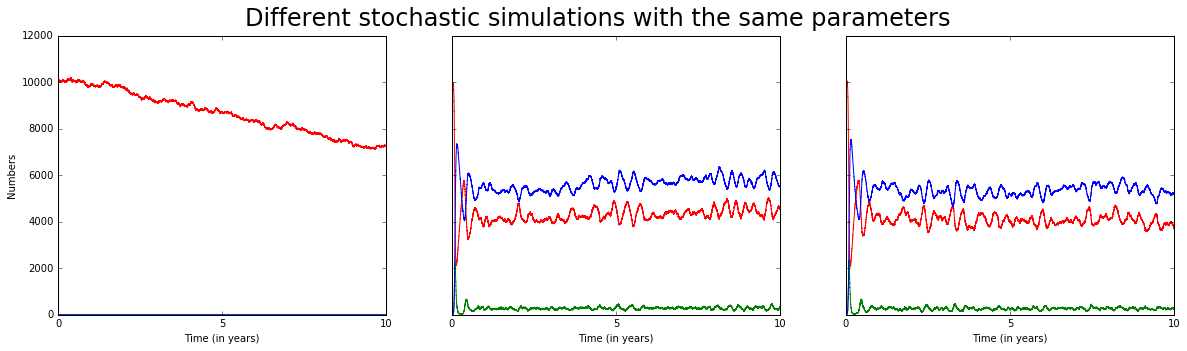

In [54]:
rate_list = [lambda y, p: p[1]*y[0]*y[1]/(y[0]+y[1]+y[2]),
             lambda y, p: p[2]*y[1],
             lambda y, p: p[4]*(y[0]+y[1]+y[2]),
             lambda y, p: p[3]*y[0],
             lambda y, p: p[3]*y[1],
             lambda y, p: p[3]*y[2]]

##deltas = np.array()
initial_values = [9999, 1, 0]
params = [10000, 0.5, 0.2, 0.01, 0.01]
y=10
maxtime = y * 365
change_list = np.array([(-1, 1, 0), (0, -1, 1), (1, 0, 0),
                        (-1, 0, 0), (0, -1, 0), (0, 0, -1)])

odenum = 3
simnum = 3
sims_values = []
for simi in range(simnum):
    [tT, values] = siteration(initial_values, params, rate_list, change_list, maxtime)
    tT = np.array(tT)/365
    sims_values.append([tT, values])

fig, axes = plt.subplots(1, simnum, sharey=True, figsize = (20, 5))
colors = ['r', 'g', 'b']
labellist = ["Susceptible", "Infected", "Recovered"]

axes[0].set_ylabel("Numbers")
for i, subplot in enumerate(axes):
    for popi in range(odenum):
        subplot.plot(sims_values[i][0], sims_values[i][1][popi], color=colors[popi], label = labellist[popi])
        subplot.xaxis.set_ticks(np.arange(0, y+0.01, y/2.))
        subplot.set_xlabel("Time (in years)")

fig.suptitle("Different stochastic simulations with the same parameters", fontsize=24)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.show()

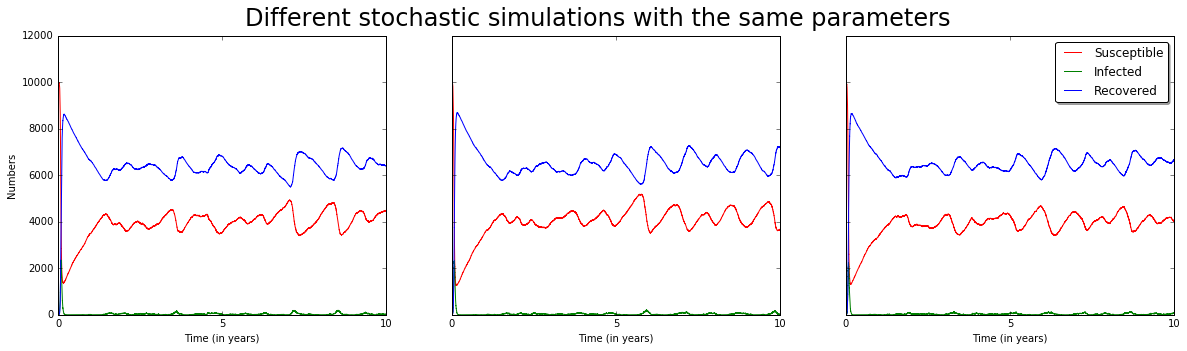

In [104]:
###VARILITY
#see above
#with import:
rate_list = [lambda y, p: p[1]*y[0]*y[1]/(y[0]+y[1]+y[2]),
             lambda y, p: p[2]*y[1],
             lambda y, p: p[4]*(y[0]+y[1]+y[2]),
             lambda y, p: p[3]*y[0],
             lambda y, p: p[3]*y[1],
             lambda y, p: p[3]*y[2],
             lambda y, p: p[5]*np.sqrt(y[0]+y[1]+y[2]),]

initial_values = [9999, 1, 0]
N0 = 10000
beta = .5
gamma = 0.2
mu = 0.001
nu = 0.001
delta = 0.002
params = [N0, beta, gamma, mu, nu, delta]
y=10
maxtime = y * 365
change_list = np.array([(-1, 1, 0), (0, -1, 1), (1, 0, 0),
                        (-1, 0, 0), (0, -1, 0), (0, 0, -1), (0, 1, 0)])

odenum = 3
simnum = 3
sims_values = []
for simi in range(simnum):
    [tT, values] = siteration(initial_values, params, rate_list, change_list, maxtime)
    tT = np.array(tT)/365
    sims_values.append([tT, values])

fig, axes = plt.subplots(1, simnum, sharey=True, figsize = (20, 5))
colors = ['r', 'g', 'b']
labellist = ["Susceptible", "Infected", "Recovered"]

axes[0].set_ylabel("Numbers")
for i, subplot in enumerate(axes):
    for popi in range(odenum):
        subplot.plot(sims_values[i][0], sims_values[i][1][popi], color=colors[popi], label = labellist[popi])
        subplot.xaxis.set_ticks(np.arange(0, y+0.01, y/2.))
        subplot.set_xlabel("Time (in years)")

fig.suptitle("Different stochastic simulations with the same parameters", fontsize=24)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)

plt.show()

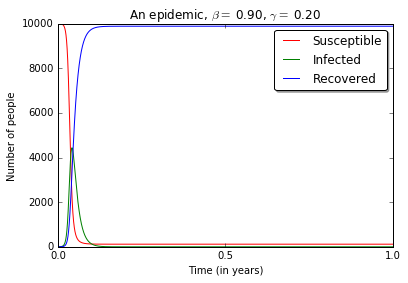

In [107]:
###Negative covariances
###the mean population level X, Y deviate from the deterministic equilibria.


functions = [lambda t,yt,p: -p[1]*yt[0]*yt[1]/p[0],
             lambda t,yt,p: p[1]*yt[0]*yt[1]/p[0]  - p[2]*yt[1],  
             lambda t,yt,p: p[2]*yt[1]]
beta = .9
gamma = 0.8
params = [10000., beta, gamma]
y=1
maxtime = y * 365

timeList, listList = RK4(0., maxtime, 0.01, [9999.,1.,0.], functions,params)

timeList = np.array(timeList)/365
plt.plot(timeList, listList[0], label = 'Susceptible', color='r')
plt.plot(timeList, listList[1], label = 'Infected', color = 'g')
plt.plot(timeList, listList[2], label = 'Recovered', color = 'b')
plt.title(r'An epidemic, $\beta =$ %1.2f, $\gamma =$ %1.2f' %(beta, gamma))
plt.ylabel('Number of people') 
plt.xlabel('Time (in years)')
plt.xticks(np.arange(0, 1+0.01, 1./2))
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.show()

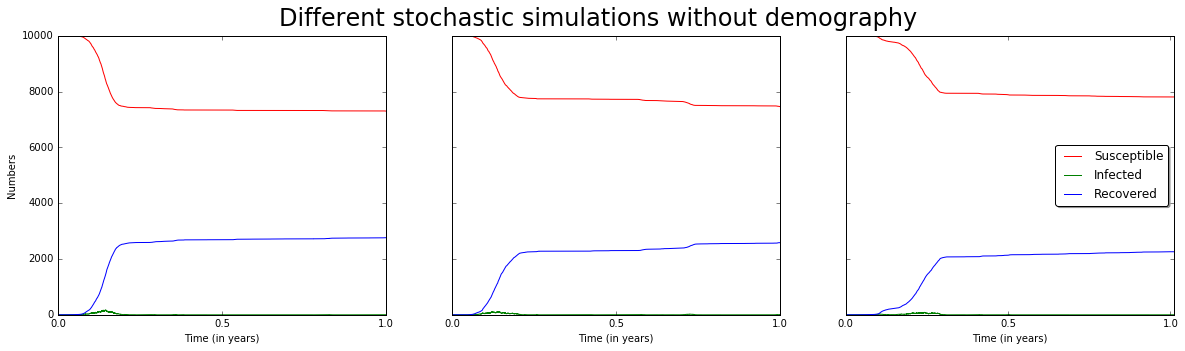

In [109]:
###VARILITY
#see above
#with import:
rate_list = [lambda y, p: p[1]*y[0]*y[1]/(y[0]+y[1]+y[2]),
             lambda y, p: p[2]*y[1],
             lambda y, p: p[4]*(y[0]+y[1]+y[2]),
             lambda y, p: p[3]*y[0],
             lambda y, p: p[3]*y[1],
             lambda y, p: p[3]*y[2],
             lambda y, p: p[5]*np.sqrt(y[0]+y[1]+y[2]),]

initial_values = [9999, 0, 0]
N0 = 10000
beta = .9
gamma = 0.8
mu = 0.00
nu = 0.00
delta = 0.002
params = [N0, beta, gamma, mu, nu, delta]
y=1
maxtime = y * 365
change_list = np.array([(-1, 1, 0), (0, -1, 1), (1, 0, 0),
                        (-1, 0, 0), (0, -1, 0), (0, 0, -1), (0, 1, 0)])

odenum = 3
simnum = 3
sims_values = []
for simi in range(simnum):
    [tT, values] = siteration(initial_values, params, rate_list, change_list, maxtime)
    tT = np.array(tT)/365
    sims_values.append([tT, values])

fig, axes = plt.subplots(1, simnum, sharey=True, figsize = (20, 5))
colors = ['r', 'g', 'b']
labellist = ["Susceptible", "Infected", "Recovered"]

axes[0].set_ylabel("Numbers")
for i, subplot in enumerate(axes):
    for popi in range(odenum):
        subplot.plot(sims_values[i][0], sims_values[i][1][popi], color=colors[popi], label = labellist[popi])
        subplot.xaxis.set_ticks(np.arange(0, y+0.01, y/2.))
        subplot.set_xlabel("Time (in years)")

fig.suptitle("Different stochastic simulations without demography", fontsize=24)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)

plt.show()

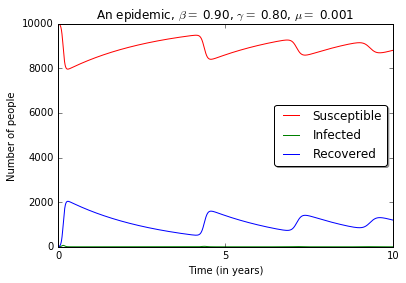

In [191]:
#Demography
functions = [lambda t,yt,p: -p[1]*yt[0]*yt[1]/p[0] + p[3]*yt[1]  + p[3]*yt[2],
             lambda t,yt,p: p[1]*yt[0]*yt[1]/p[0]  - p[2]*yt[1] - p[3]*yt[1],  
             lambda t,yt,p: p[2]*yt[1] - p[3]*yt[2] 
             ]

beta = .9
gamma = 0.8
mu = 0.001
params = [10000., beta, gamma, mu]
y=10
maxtime = y * 365

timeList, listList = RK4(0., maxtime, 0.01, [9999.,1.,0.], functions,params)

timeList = np.array(timeList)/365
plt.plot(timeList, listList[0], label = 'Susceptible', color='r')
plt.plot(timeList, listList[1], label = 'Infected', color = 'g')
plt.plot(timeList, listList[2], label = 'Recovered', color = 'b')
plt.title(r'An epidemic, $\beta =$ %1.2f, $\gamma =$ %1.2f, $\mu =$ %1.3f' %(beta, gamma, mu))
plt.ylabel('Number of people') 
plt.xlabel('Time (in years)')
plt.xticks(np.arange(0, y+0.01, y*0.5))
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.show()

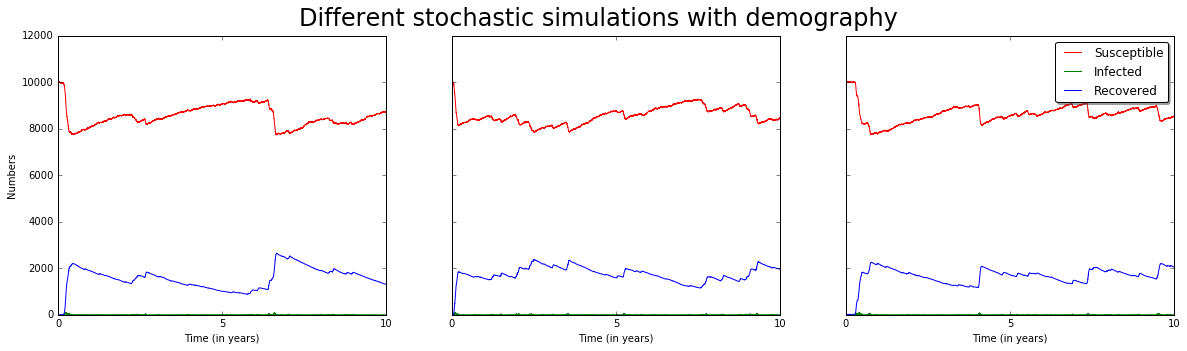

In [192]:
rate_list = [lambda y, p: p[1]*y[0]*y[1]/(y[0]+y[1]+y[2]),
             lambda y, p: p[2]*y[1],
             lambda y, p: p[4]*(y[0]+y[1]+y[2]),
             lambda y, p: p[3]*y[0],
             lambda y, p: p[3]*y[1],
             lambda y, p: p[3]*y[2],
             lambda y, p: p[5]*np.sqrt(y[0]+y[1]+y[2]),]

N0 = 10000
initial_values = [10000, 0, 0]
beta = .9
gamma = 0.8
mu = 0.001
nu = 0.001
delta = 0.001
params = [N0, beta, gamma, mu, nu, delta]
y= 10
maxtime = y * 365
change_list = np.array([(-1, 1, 0), (0, -1, 1), (1, 0, 0),
                        (-1, 0, 0), (0, -1, 0), (0, 0, -1), (0, 1, 0)])

odenum = 3
simnum = 3
sims_values = []
for simi in range(simnum):
    [tT, values] = siteration(initial_values, params, rate_list, change_list, maxtime)
    tT = np.array(tT)/365
    sims_values.append([tT, values])

fig, axes = plt.subplots(1, simnum, sharey=True, figsize = (20, 5))
colors = ['r', 'g', 'b']
labellist = ["Susceptible", "Infected", "Recovered"]

axes[0].set_ylabel("Numbers")
for i, subplot in enumerate(axes):
    for popi in range(odenum):
        subplot.plot(sims_values[i][0], sims_values[i][1][popi], color=colors[popi], label = labellist[popi])
        subplot.xaxis.set_ticks(np.arange(0, y+0.01, y/2.))
        subplot.set_xlabel("Time (in years)")

fig.suptitle("Different stochastic simulations with demography", fontsize=24)
subplot.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.show()


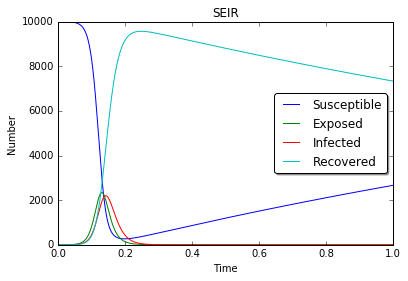

In [346]:
##SEIR
functions = [lambda t,yt,p: -p[1]*yt[0]*yt[2]/p[0] + p[3]*(p[0] -yt[0]),
             lambda t,yt,p: p[1]*yt[0]*yt[2]/p[0]-(p[3]+p[4])*yt[1],
             lambda t,yt,p: p[4]*yt[1]-(p[2] + p[3])*yt[2],
             lambda t,yt,p: p[2]*yt[2] - p[3]*yt[3]
             ]

beta = .8
gamma = 0.18
mu = 0.001
alpha = 0.2
params = [10000., beta, gamma, mu, alpha]

timeList, listList = RK4(0.,maxtime,0.01,[9999.,1.,0., 0],functions,params)
timeList = np.array(timeList)/365
plt.plot(timeList, listList[0], label = 'Susceptible')
plt.plot(timeList, listList[1], label = 'Exposed')
plt.plot(timeList, listList[2], label = 'Infected')
plt.plot(timeList, listList[3], label = 'Recovered')
plt.title("A deterministic SEIR simulation of disease spread") 
plt.ylabel('Number') 
plt.xlabel('Time')
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.show()

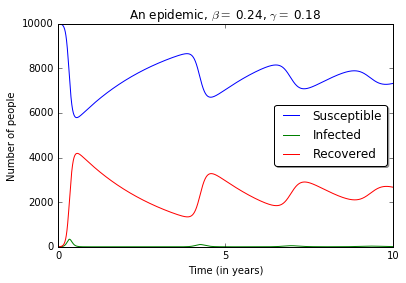

In [9]:
###Increased transients
#ODEterministic


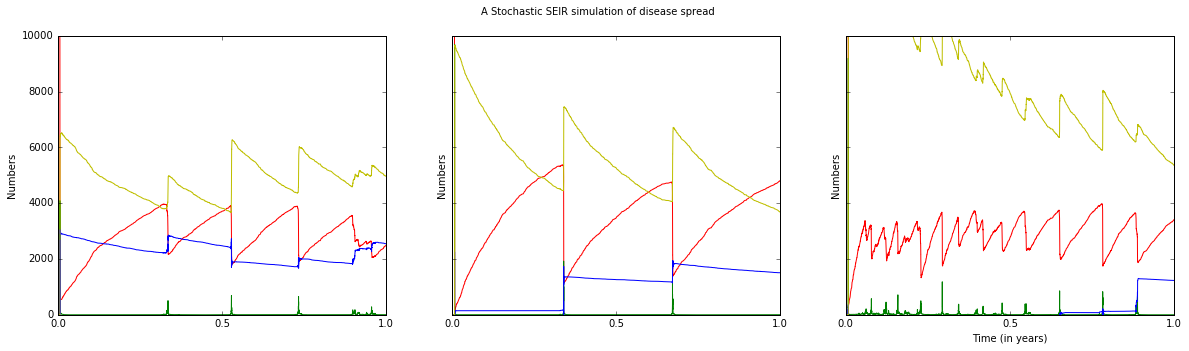

In [11]:
###Increased transients
#Stode



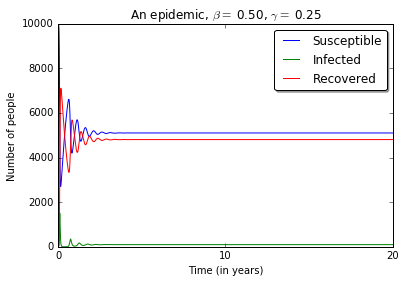

In [193]:
###Stochastic resonance
#Det
functions = [lambda t,yt,p: -p[1]*yt[0]*yt[1]/p[0] + p[3]*yt[1]  + p[3]*yt[2],
             lambda t,yt,p: p[1]*yt[0]*yt[1]/p[0]  - p[2]*yt[1] - p[3]*yt[1],  
             lambda t,yt,p: p[2]*yt[1] - p[3]*yt[2] 
             ]
y = 20.
maxtime = y*365
beta = .5
gamma = 0.25
mu = 0.005
params = [10000., beta, gamma, mu]

timeList, listList = RK4(0., maxtime, 0.01, [9999.,1.,0.], functions,params)

timeList = np.array(timeList)/365
plt.plot(timeList, listList[0], label = 'Susceptible')
plt.plot(timeList, listList[1], label = 'Infected')
plt.plot(timeList, listList[2], label = 'Recovered')
plt.title(r'An epidemic, $\beta =$ %1.2f, $\gamma =$ %1.2f' %(beta, gamma))
plt.ylabel('Number of people') 
plt.xlabel('Time (in years)')
plt.xticks(np.arange(0, y+0.01, y*0.5))
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.show()

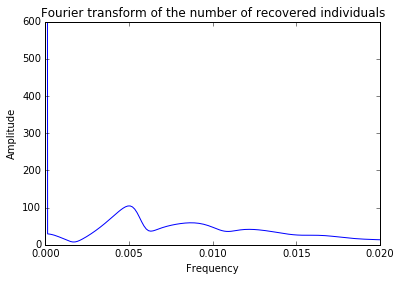

In [194]:
#Fourier DET
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = len(listList[2])
# sample spacing
T = 0.01
x = timeList
y = listList[2]
yf = np.fft.rfft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf,  2.0 / N * np.abs(yf[0:N/2]))
ax.set_xlim(0.000001,.02)
ax.set_ylim(0,600)
ax.set_xlabel("Frequency")
ax.set_ylabel("Amplitude")
ax.set_title("Fourier transform of the number of recovered individuals")
plt.show()

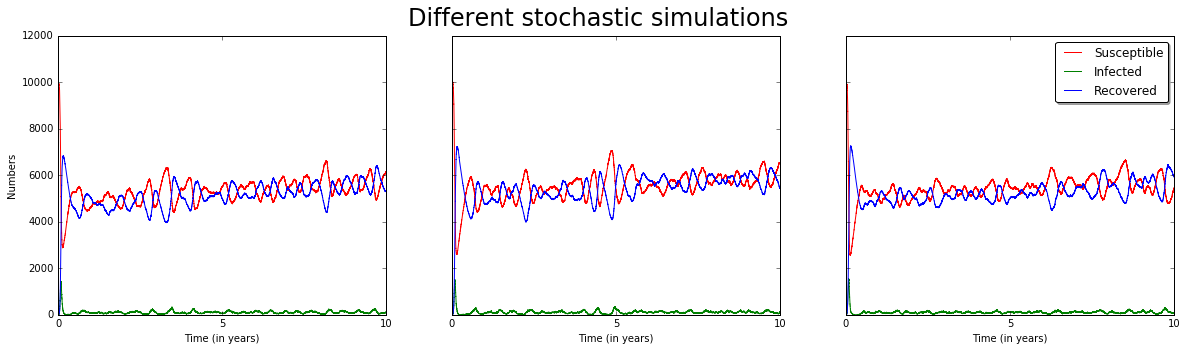

In [195]:
rate_list = [lambda y, p: p[1]*y[0]*y[1]/(y[0]+y[1]+y[2]),
             lambda y, p: p[2]*y[1],
             lambda y, p: p[4]*(y[0]+y[1]+y[2]),
             lambda y, p: p[3]*y[0],
             lambda y, p: p[3]*y[1],
             lambda y, p: p[3]*y[2],
             lambda y, p: p[5]*np.sqrt(y[0]+y[1]+y[2]),]

N0 = 10000
initial_values = [10000, 0, 0]
beta = .5
gamma = 0.25
mu = 0.005
nu = 0.005
delta = 0.005
params = [N0, beta, gamma, mu, nu, delta]
y= 10
maxtime = y * 365
change_list = np.array([(-1, 1, 0), (0, -1, 1), (1, 0, 0),
                        (-1, 0, 0), (0, -1, 0), (0, 0, -1), (0, 1, 0)])

odenum = 3
simnum = 3
sims_values = []
for simi in range(simnum):
    [tT, values] = siteration(initial_values, params, rate_list, change_list, maxtime)
    tT = np.array(tT)/365
    sims_values.append([tT, values])

fig, axes = plt.subplots(1, simnum, sharey=True, figsize = (20, 5))
colors = ['r', 'g', 'b']
labellist = ["Susceptible", "Infected", "Recovered"]

axes[0].set_ylabel("Numbers")
for i, subplot in enumerate(axes):
    for popi in range(odenum):
        subplot.plot(sims_values[i][0], sims_values[i][1][popi], color=colors[popi], label = labellist[popi])
        subplot.xaxis.set_ticks(np.arange(0, y+0.01, y/2.))
        subplot.set_xlabel("Time (in years)")

fig.suptitle("Different stochastic simulations", fontsize=24)
subplot.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.show()


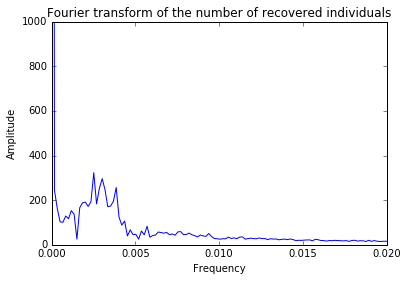

In [196]:
#Fourier Stoch

# Number of samplepoints
N = len(sims_values[2][1][2])
# sample spacing
T = 0.01
x = sims_values[2][0]
y = sims_values[2][1][2]
yf = np.fft.rfft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf,  2.0 / N * np.abs(yf[0:N/2]))
ax.set_xlim(0.000001,.02)
ax.set_ylim(0,1000)
ax.set_xlabel("Frequency")
ax.set_ylabel("Amplitude")
ax.set_title("Fourier transform of the number of recovered individuals")
plt.show()

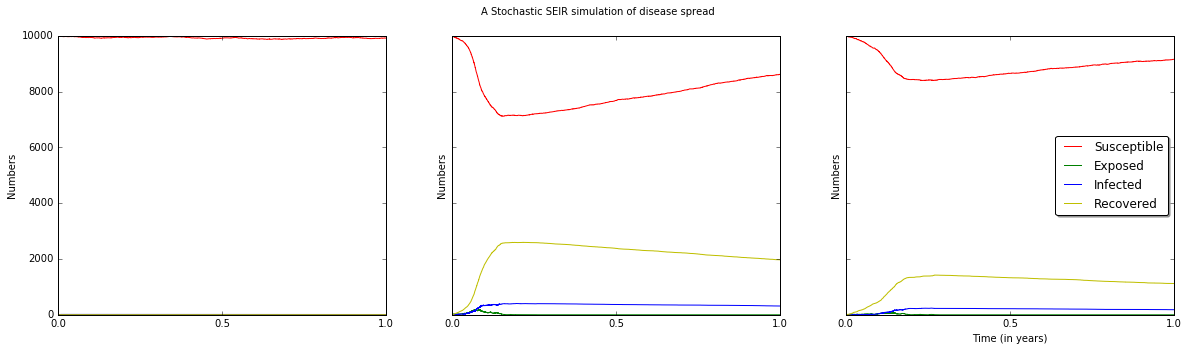

In [184]:
###EXTinction 
#SEIR

#geir
rate_list = [lambda y, p: p[1]*y[0]*y[1]/(y[0]+y[1]+y[2]+y[3]),
             lambda y, p: p[5]*y[1],
             lambda y, p: p[2]*y[1],
             lambda y, p: p[4]*(y[0]+y[1]+y[2]+y[3]),
             lambda y, p: p[3]*y[0],
             lambda y, p: p[3]*y[1],
             lambda y, p: p[3]*y[2],
             lambda y, p: p[3]*y[3],
             lambda y, p: p[6]*np.sqrt(y[0]+y[1]+y[2]+y[3])
            ]

##deltas = np.array()
initial_values = [10000, 10, 0, 0]
N0 = 10000
beta = .8
gamma = 0.6
mu = 0.001
nu = 0.001
alpha = 0.7
delta = 0.00
params = [N0, beta, gamma, mu, nu, alpha, delta]
y= 1.
maxtime = y * 365
change_list = np.array([(-1, 1, 0, 0), (0, -1, 1, 0), (0, 0, -1, 1), (1, 0, 0, 0),
                        (-1, 0, 0, 0), (0, -1, 0, 0), (1, 0, -1, 0), (1, 0, 0, -1), (0, 1, 0, 0)])

odenum = 4
simnum = 3
sims_values = []
for simi in range(simnum):
    [tT, values] = siteration(initial_values, params, rate_list, change_list, maxtime)
    tT = np.array(tT)/365
    sims_values.append([tT, values])

fig, axes = plt.subplots(1, simnum, sharey=True, figsize = (20, 5))
colors = ['r', 'g', 'b', 'y']
labellist = ["Susceptible", "Exposed", "Infected", "Recovered"]

for i, subplot in enumerate(axes):
    for popi in range(odenum):
        subplot.plot(sims_values[i][0], sims_values[i][1][popi], color=colors[popi], label = labellist[popi])
        subplot.xaxis.set_ticks(np.arange(0, y+0.01, y/2.))
        subplot.set_ylabel("Numbers")
        subplot.set_ylim(0, N0)
subplot.set_xlabel("Time (in years)")
fig.suptitle("A Stochastic SEIR simulation of disease spread")
subplot.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.show()

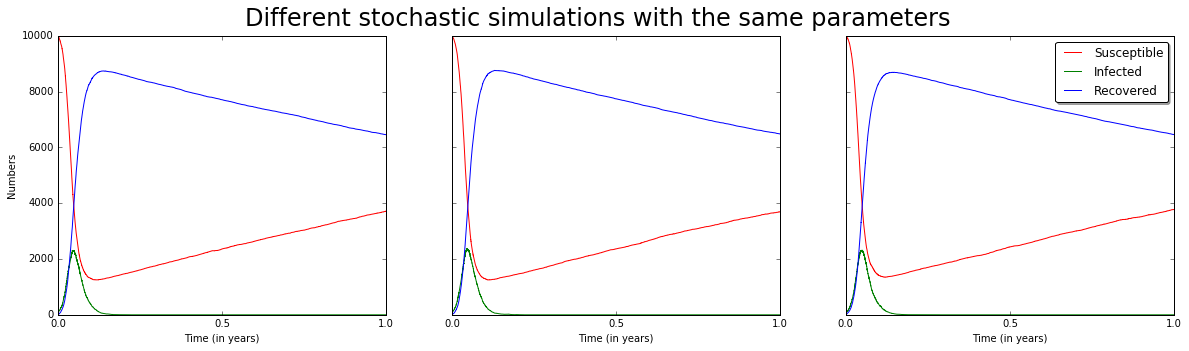

In [183]:
#EXT SIR
rate_list = [lambda y, p: p[1]*y[0]*y[1]/(y[0]+y[1]+y[2]),
             lambda y, p: p[2]*y[1],
             lambda y, p: p[4]*(y[0]+y[1]+y[2]),
             lambda y, p: p[3]*y[0],
             lambda y, p: p[3]*y[1],
             lambda y, p: p[3]*y[2]]

##deltas = np.array()
initial_values = [9999, 100, 0]
N0 = 10000
beta = .5
gamma = 0.2
mu = 0.001
nu = 0.001
params = [N0, beta, gamma, mu, nu]
y=1
maxtime = y * 365
change_list = np.array([(-1, 1, 0), (0, -1, 1), (1, 0, 0),
                        (-1, 0, 0), (0, -1, 0), (0, 0, -1)])

odenum = 3
simnum = 3
sims_values = []
for simi in range(simnum):
    [tT, values] = siteration(initial_values, params, rate_list, change_list, maxtime)
    tT = np.array(tT)/365
    sims_values.append([tT, values])

fig, axes = plt.subplots(1, simnum, sharey=True, figsize = (20, 5))
colors = ['r', 'g', 'b']
labellist = ["Susceptible", "Infected", "Recovered"]

axes[0].set_ylabel("Numbers")
for i, subplot in enumerate(axes):
    for popi in range(odenum):
        subplot.plot(sims_values[i][0], sims_values[i][1][popi], color=colors[popi], label = labellist[popi])
        subplot.xaxis.set_ticks(np.arange(0, y+0.01, y/2.))
        subplot.set_xlabel("Time (in years)")

fig.suptitle("Different stochastic simulations with the same parameters", fontsize=24)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=1)
plt.show()

('N_0', array([  1900.,    100.,      0.,  10000.,      0.,      0.,   5000.,
            0.,      0.]))
('beta', array([ 0.28574192,  0.30375383,  0.29820229]))
('gamma', array([ 0.24952115,  0.24519206,  0.2534491 ]))
('mu', array([ 0.01107709,  0.01119776,  0.01107533]))
('nu', array([ 0.01107709,  0.01119776,  0.01107533]))
('rho', array([[ 1.        ,  0.00837244,  0.01013093],
       [ 0.0111451 ,  1.        ,  0.01053537],
       [ 0.01014867,  0.01032566,  1.        ]]))
('delta', array([ 0.,  0.,  0.]))


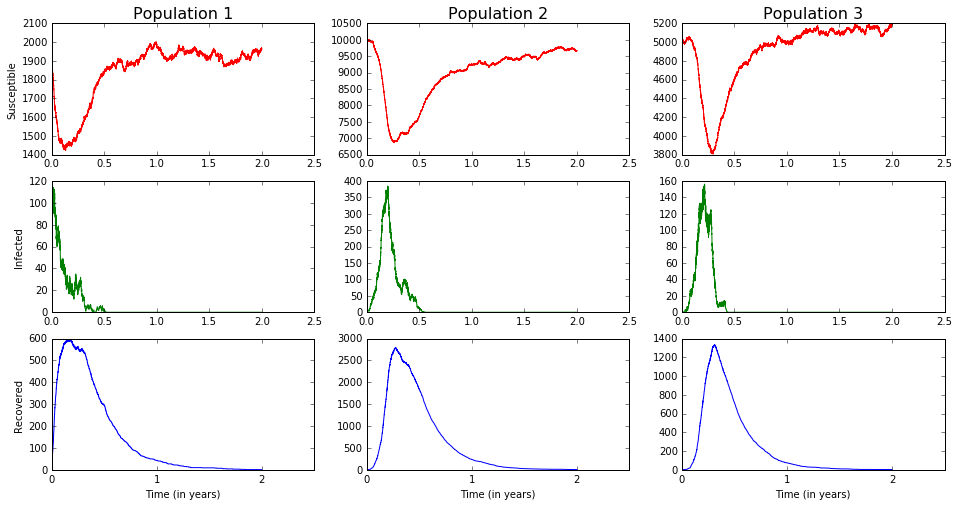

In [205]:
####METAPOPULATION (withohut imports)
popnum = 3
ratenum = 7
odenum = 3
rate_lists = [
            [lambda y, p, i=i : p[1][i]*y[i*odenum]*lambdai(y, p[5][i,:])/(y[i*odenum] + y[1+i*odenum]+ y[2+i*odenum]),
             lambda y, p, i=i : p[2][i]*y[1+i*odenum],
             lambda y, p, i=i : p[3][i]*(y[i*odenum] + y[1+i*odenum]+ y[2+i*odenum]),
             lambda y, p, i=i : p[3][i]*y[i*odenum],
             lambda y, p, i=i : p[3][i]*y[1+i*odenum],
             lambda y, p, i=i : p[3][i]*y[2+i*odenum],
             lambda y, p: p[6][i]*np.sqrt(y[i*odenum] + y[1+i*odenum]+ y[2+i*odenum])]
              for i in range(popnum)]
rate_list = [item for sublist in rate_lists for item in sublist]

lambdai = lambda y, rho: np.sum([rho[k]*y[1+k*odenum] for k in range(popnum)])


popstart = np.array([1900., 100., 0., 10000., 0., 0., 5000., 0., 0.])
# popstart = np.array([1999., 1., 0., 999., 1., 0.])
# popstart = np.array([1999., 1., 0.])
rho = np.abs(np.random.normal(0.01, 0.001, (popnum, popnum)))
np.fill_diagonal(rho, 1)
beta = np.abs(np.random.normal(0.3, 0.01, popnum))
gamma = np.abs(np.random.normal(0.25, 0.01, popnum))
mu = np.abs(np.random.normal(0.01, 0.001, popnum))
nu = mu
delta = np.ones((popnum,))*0.00
params = [popstart, beta, gamma, mu, nu, rho, delta]
paramnames = ["N_0", "beta", "gamma", "mu", "nu", "rho", "delta"]

for i, par in enumerate(params):
    print(paramnames[i], par)

y =2
maxtime = y*365

change_matrix = np.zeros((popnum*ratenum, odenum*popnum))
for i in range(popnum):
    change_matrix[i*ratenum:(i+1)*ratenum, i*odenum:(i+1)*odenum] = np.array([(-1, 1, 0), (0, -1, 1), (1, 0, 0), (-1, 0, 0), (0, -1, 0), (0, 0, -1), (0, 1, 0)])

[tT, values_list] = siteration(popstart, params, rate_list, change_matrix, maxtime)

tT = np.array(tT)/365
# f, axs = plt.subplots(odenum,popnum,figsize=(15,15))
nrows = 3
fig, axes = plt.subplots(odenum, popnum, figsize = (16, 8))

colors = ['r', 'g', 'b']

for i, row in enumerate(axes):
    for popi in range(popnum):
        row[popi].plot(tT, values_list[i+popi*odenum], color=colors[i])
        if i == popnum - 1:
            row[popi].set_xlabel("Time (in years)")
            row[popi].xaxis.set_ticks(np.arange(0, y+0.01, y/2.))
    
labellist = ["Susceptible", "Infected", "Recovered"]
for i, row in enumerate(axes):
    row[0].set_ylabel(labellist[i])
for i, row in enumerate(axes[0]): 
    row.set_title("Population %d" %(i+1), fontsize=16)
    


plt.show()


('beta', 0.49703501257870425)
('gamma', 0.19925593113470219)
('mu', 0.0095883665764409029)
('Time:', 5.65, 'min')


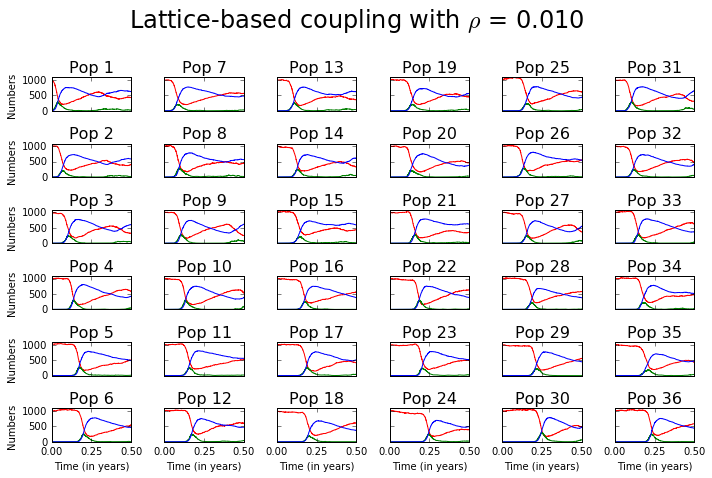

In [197]:
###Lattice model
lattice_size = 6
popnum = lattice_size**2
ratenum = 6
odenum = 3
shift = lattice_size 

rate_lists = [
            [lambda y, p, i=i : p[1][i]*y[i*odenum]*lambdai(y, p[5][i,:])/(y[i*odenum] + y[1+i*odenum]+ y[2+i*odenum]),
             lambda y, p, i=i : p[2][i]*y[1+i*odenum],
             lambda y, p, i=i : p[4][i]*(y[i*odenum] + y[1+i*odenum]+ y[2+i*odenum]),
             lambda y, p, i=i : p[3][i]*y[i*odenum],
             lambda y, p, i=i : p[3][i]*y[1+i*odenum],
             lambda y, p, i=i : p[3][i]*y[2+i*odenum]]
              for i in range(popnum)]
rate_list = [item for sublist in rate_lists for item in sublist]

lambdai = lambda y, rho: np.sum([rho[k]*y[1+k*odenum] for k in range(popnum)])


interaction = 0.01
a = np.ones((1, popnum))[0]
bb = np.append(np.ones((1, popnum-(lattice_size)))[0] * interaction, np.zeros(lattice_size-1))
bt = np.append(np.zeros(lattice_size-1), np.ones((1, popnum-(lattice_size)))[0] * interaction)
c = np.ones((1, popnum-shift))[0] * interaction
rho = np.diag(a, 0) + np.diag(bb, -1) + np.diag(bt, 1) + np.diag(c, -shift) + np.diag(c, shift)

N0 = 1000.
popstart = np.array([N0, 0., 0.]*popnum)
popstart[0:3] = np.array([990., 10., 0.])
beta = np.abs(np.random.normal(0.5, 0.01, popnum))
gamma = np.abs(np.random.normal(0.2, 0.01, popnum))
mu = np.abs(np.random.normal(0.01, 0.001, popnum))
nu = mu
params = [popstart, beta, gamma, mu, nu, rho]
paramnames = ["N_0", "beta", "gamma", "mu", "nu", "rho"]

for i, par in enumerate(params[1:-2]):
    print(paramnames[i+1], np.average(par))
y = 0.5
maxtime = y*365

change_matrix = np.zeros((popnum*ratenum, odenum*popnum))
for i in range(popnum):
    change_matrix[i*ratenum:(i+1)*ratenum, i*odenum:(i+1)*odenum] = np.array([(-1, 1, 0), (0, -1, 1), (1, 0, 0), (-1, 0, 0), (0, -1, 0), (0, 0, -1)])

st = time.time()
[tT, values_list] = siteration(popstart, params, rate_list, change_matrix, maxtime)
print("Time:", round((time.time()-st)/60, 2), "min")

tT = np.array(tT)/365
fig, axes = plt.subplots(lattice_size, lattice_size, sharex=True, sharey=True, figsize = (10, 6))


colors = ['r', 'g', 'b']

for i, subplot in enumerate([item for sublist in axes for item in sublist]):
    for popi in range(odenum):
        subplot.plot(tT, values_list[popi+i*odenum], color=colors[popi])
        subplot.xaxis.set_ticks(np.arange(0, y+0.01, y/2.))
        subplot.yaxis.set_ticks(np.arange(0, N0+0.001, N0/2.))
    if i in range(lattice_size*(lattice_size -1),lattice_size*lattice_size):
        subplot.set_xlabel("Time (in years)")
    if i % lattice_size == 0:
        subplot.set_ylabel("Numbers")

for i, row in enumerate(axes): 
    for j, col in enumerate(row):
        row[j].set_title("Pop %d" %(i+j*lattice_size+1), fontsize=16)
        
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
fig.suptitle(r'Lattice-based coupling with $\rho$ = %1.3f' %(interaction),  fontsize=24, position=(0.5, 1.1))


plt.show()